In [1]:
# Import and GPU Support
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import time

from B_data import create_residual_data, create_IC_data, initial_u,exact_u, create_BC_data, create_RH_data,create_RH_data_endt,Move_Time_1D,burgersDdt_godunov,godunov
from B_Plotting import Burgers_plot, loss_plot 
from scipy.integrate import solve_ivp

# Full PINN
from B_PINN import NN
from B_PINN_train import pinn_train

# Burgers GPT-PINN
from B_GPT_activation import P
from B_GPT_PINN import GPT
from B_GPT_train import gpt_train

torch.set_default_dtype(torch.float)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current Device: {device}")
if torch.cuda.is_available():
    print(f"Current Device Name: {torch.cuda.get_device_name()}")

Current Device: cuda
Current Device Name: NVIDIA A100-SXM4-40GB


In [2]:
# Training Parameter Set
number_of_parameters = 2
nu1_training = np.linspace(0.0, 0.0, 1)
nu2_training  = np.linspace(0.5,1.0, number_of_parameters)

nu_training = []
for i in range(nu1_training.shape[0]):
    for j in range(nu2_training.shape[0]):
        nu_training.append([nu1_training[i],nu2_training[j]])
nu_training = np.array(nu_training)

nu_pinn_train = [0.0,1.0]
number_of_neurons = 2
P_list = np.ones(number_of_neurons, dtype=object)

In [3]:
# Domain and Data
Xi, Xf         = -1.0, 1.5
Ti, Tf         =  0.0, 1.5
Nx_train, Nt_train =  101, 201
Nx_test, Nt_test = 101, 201
IC_pts, IC_simple = 100, 100
BC_pts =  100
N_RH = IC_pts
dx = 0.001
dt = 0.0002

residual_data = create_residual_data(Xi, Xf, Ti, Tf, Nx_train, Nt_train, Nx_test, Nt_test, dx,dt)
xt_resid      = residual_data[0].to(device)
f_hat         = residual_data[1].to(device)
xt_test       = residual_data[2].to(device)
xt_RHL      = residual_data[3].to(device)
xt_RHR      = residual_data[4].to(device)
xt_RHt         = residual_data[5].to(device)
xt_RHtL       = residual_data[6].to(device)


IC_x_test=xt_test[0:Nx_test,:1].squeeze().cpu()
IC_t_test=xt_test[0:Nx_test*Nt_test:Nx_test,1:].squeeze().cpu()

BC_data = create_BC_data(Xi, Xf, Ti, Tf, BC_pts)
BC1     = BC_data[0].to(device)
BC2     = BC_data[1].to(device)

#xt_RH_data = create_RH_data(Xi, Xf, Ti, Tf, IC_pts, N_RH,dx)
#xt_RH = xt_RH_data[0].to(device)
#xt_RHL = xt_RH_data[1].to(device)

IC_data = create_IC_data(nu_pinn_train,Xi, Xf, Ti, Tf, IC_pts, IC_simple)
IC_xt     = IC_data[0].to(device)
IC_u      = IC_data[1].to(device)

xt_en = Move_Time_1D(IC_xt, Tf).to(device)

In [4]:
# Setting PINN and TGPT-PINN
layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
#layers_pinn = np.array([2,20,20,20,20,20, 1])

lr_pinn     = 0.001
epochs_pinn = 30000
tol_pinn    = 1e-5

pinn_train_times = np.ones(number_of_neurons)

###############################################################################
################################ Training Loop ################################
###############################################################################

******************************************************************


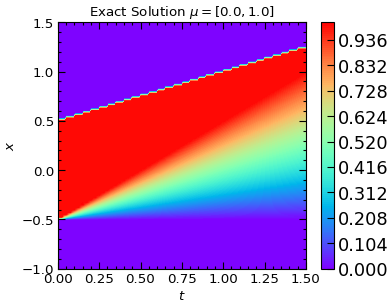

Epoch: 200 | loss: 0.617544412612915,rMAE: 0.48628416657447815, rRMSE:0.5032349228858948,loss_RH:0.00000000,loss_con:0.00000808,loss_R:0.11203661561012268,loss_IC:0.04834112152457237,loss_BC:0.0022096603643149137
Epoch: 400 | loss: 0.543780505657196,rMAE: 0.3299138844013214, rRMSE:0.3763774037361145,loss_RH:0.00000000,loss_con:0.00004558,loss_R:0.10669640451669693,loss_IC:0.04263820871710777,loss_BC:0.0010702002327889204
Epoch: 600 | loss: 0.47659483551979065,rMAE: 0.26011529564857483, rRMSE:0.2901706099510193,loss_RH:0.00000000,loss_con:0.00009724,loss_R:0.11459914594888687,loss_IC:0.0356379933655262,loss_BC:0.00056157709332183
Epoch: 800 | loss: 0.36073848605155945,rMAE: 0.2142602652311325, rRMSE:0.2377108931541443,loss_RH:0.00000000,loss_con:0.00002962,loss_R:0.12365620583295822,loss_IC:0.02352709323167801,loss_BC:0.00018113525584340096
Epoch: 1000 | loss: 0.22722044587135315,rMAE: 0.13686884939670563, rRMSE:0.16374571621418,loss_RH:0.00000000,loss_con:0.00000450,loss_R:0.0986998081

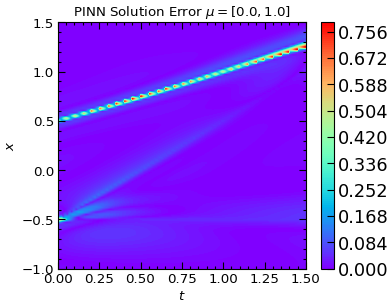

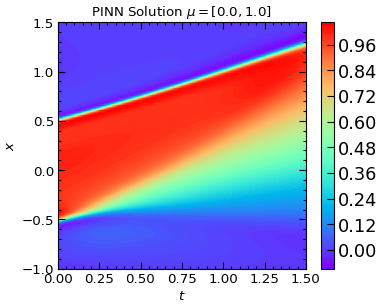

Epoch: 2200 | loss: 0.0802585706114769,rMAE: 0.05135529115796089, rRMSE:0.0937303900718689,loss_RH:0.00000000,loss_con:0.00002359,loss_R:0.06381017714738846,loss_IC:0.001617937465198338,loss_BC:2.69018692051759e-05
Epoch: 2400 | loss: 0.0743987038731575,rMAE: 0.04870925471186638, rRMSE:0.09162280708551407,loss_RH:0.00000000,loss_con:0.00007596,loss_R:0.06334558874368668,loss_IC:0.0010536679765209556,loss_BC:5.1643612096086144e-05
Epoch: 2600 | loss: 0.08186657726764679,rMAE: 0.047074828296899796, rRMSE:0.09173605591058731,loss_RH:0.00000000,loss_con:0.00007720,loss_R:0.07484316825866699,loss_IC:0.0006513528642244637,loss_BC:5.0988350267289206e-05
Epoch: 2800 | loss: 0.06152088940143585,rMAE: 0.044776394963264465, rRMSE:0.09138589352369308,loss_RH:0.00000000,loss_con:0.00000023,loss_R:0.05789172649383545,loss_IC:0.00035391226992942393,loss_BC:9.00388477020897e-06
Epoch: 3000 | loss: 0.07715367525815964,rMAE: 0.040886618196964264, rRMSE:0.08974885940551758,loss_RH:0.00000000,loss_con:0.0

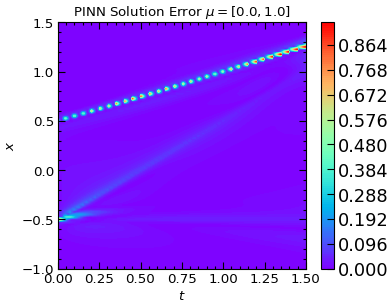

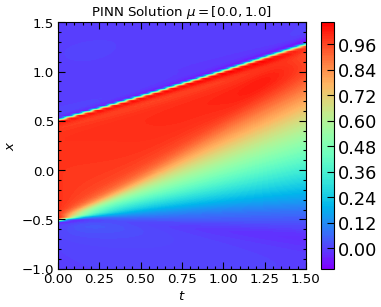

Epoch: 4200 | loss: 0.07976117730140686,rMAE: 0.03341524675488472, rRMSE:0.08055049926042557,loss_RH:0.00000000,loss_con:0.00006788,loss_R:0.07900906354188919,loss_IC:4.031453136121854e-05,loss_BC:3.489667142275721e-05
Epoch: 4400 | loss: 0.09126026183366776,rMAE: 0.03400329872965813, rRMSE:0.07862716168165207,loss_RH:0.00000000,loss_con:0.00005068,loss_R:0.09067331999540329,loss_IC:3.1355273677036166e-05,loss_BC:2.7338830477674492e-05
Epoch: 4600 | loss: 0.08098287880420685,rMAE: 0.035112276673316956, rRMSE:0.07768186181783676,loss_RH:0.00000000,loss_con:0.00001716,loss_R:0.08067815750837326,loss_IC:2.0947816665284336e-05,loss_BC:9.524250344838947e-06
Epoch: 4800 | loss: 0.03375689312815666,rMAE: 0.03174792602658272, rRMSE:0.07631178945302963,loss_RH:0.00000000,loss_con:0.00002848,loss_R:0.03344385698437691,loss_IC:1.669865923759062e-05,loss_BC:1.4605103388021234e-05
Epoch: 5000 | loss: 0.0669359639286995,rMAE: 0.028919517993927002, rRMSE:0.07609251141548157,loss_RH:0.00000000,loss_co

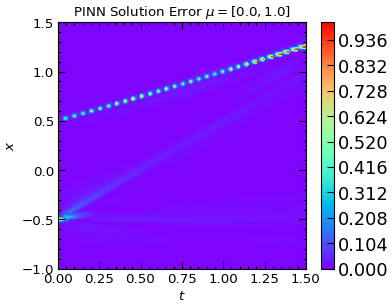

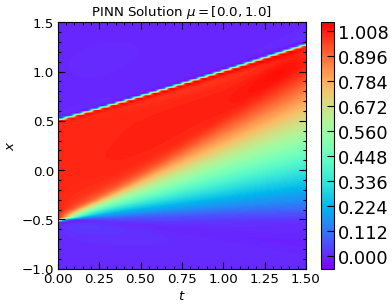

Epoch: 6200 | loss: 0.06359393149614334,rMAE: 0.026398135349154472, rRMSE:0.0714915469288826,loss_RH:0.00000000,loss_con:0.00002293,loss_R:0.06316322088241577,loss_IC:3.0996143323136494e-05,loss_BC:1.2075147424184252e-05
Epoch: 6400 | loss: 0.08947243541479111,rMAE: 0.025205561891198158, rRMSE:0.06850320845842361,loss_RH:0.00000000,loss_con:0.00000145,loss_R:0.08936358243227005,loss_IC:9.163038157566916e-06,loss_BC:1.7223981103597907e-06
Epoch: 6600 | loss: 0.030879056081175804,rMAE: 0.03328681364655495, rRMSE:0.07208932936191559,loss_RH:0.00000000,loss_con:0.00006424,loss_R:0.030319876968860626,loss_IC:2.3371334464172833e-05,loss_BC:3.25465043715667e-05
Epoch: 6800 | loss: 0.07027177512645721,rMAE: 0.026156876236200333, rRMSE:0.06552435457706451,loss_RH:0.00000000,loss_con:0.00007502,loss_R:0.06970982253551483,loss_IC:1.7735419532982633e-05,loss_BC:3.8459606003016233e-05
Epoch: 7000 | loss: 0.07082021236419678,rMAE: 0.023154323920607567, rRMSE:0.07552538812160492,loss_RH:0.00000000,lo

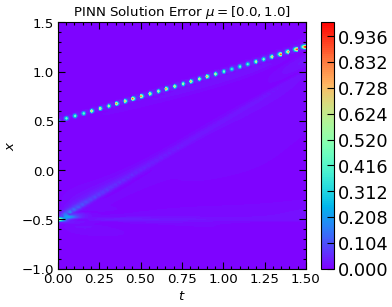

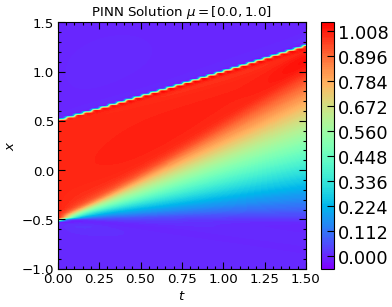

Epoch: 8200 | loss: 0.05344054102897644,rMAE: 0.017377588897943497, rRMSE:0.061090368777513504,loss_RH:0.00000000,loss_con:0.00001550,loss_R:0.05329269915819168,loss_IC:6.364061846397817e-06,loss_BC:8.420012818532996e-06
Epoch: 8400 | loss: 0.05002487823367119,rMAE: 0.025556186214089394, rRMSE:0.05687389895319939,loss_RH:0.00006781,loss_con:0.00000153,loss_R:0.04917773976922035,loss_IC:1.4898925655870698e-05,loss_BC:2.009735908359289e-06
Epoch: 8600 | loss: 0.05265430733561516,rMAE: 0.02494947798550129, rRMSE:0.0518215149641037,loss_RH:0.00005941,loss_con:0.00001316,loss_R:0.05192799121141434,loss_IC:6.3641564338468015e-06,loss_BC:6.860528628749307e-06
Epoch: 8800 | loss: 0.042583201080560684,rMAE: 0.018472833558917046, rRMSE:0.06946591287851334,loss_RH:0.00000000,loss_con:0.00000263,loss_R:0.04246879741549492,loss_IC:8.88557406142354e-06,loss_BC:2.554904313001316e-06
Epoch: 9000 | loss: 0.06335198879241943,rMAE: 0.016710314899683, rRMSE:0.047947559505701065,loss_RH:0.00012136,loss_con

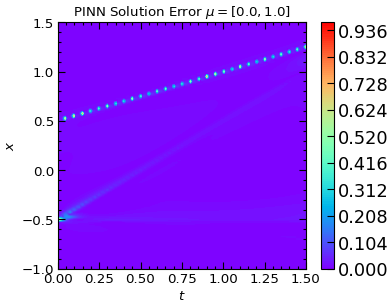

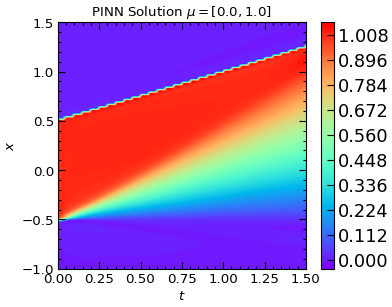

Epoch: 10200 | loss: 0.03982529044151306,rMAE: 0.014424124732613564, rRMSE:0.04674107953906059,loss_RH:0.00005423,loss_con:0.00000539,loss_R:0.03919997438788414,loss_IC:5.441878329293104e-06,loss_BC:2.8643285077123437e-06
Epoch: 10400 | loss: 0.04170535132288933,rMAE: 0.023513907566666603, rRMSE:0.06151522696018219,loss_RH:0.00020788,loss_con:0.00000087,loss_R:0.03927880898118019,loss_IC:3.0195160434232093e-05,loss_BC:4.5830156523152255e-06
Epoch: 10600 | loss: 0.05505659058690071,rMAE: 0.015862159430980682, rRMSE:0.055538080632686615,loss_RH:0.00006424,loss_con:0.00000317,loss_R:0.05429646000266075,loss_IC:1.0023005415860098e-05,loss_BC:1.7486619299234007e-06
Epoch: 10800 | loss: 0.06139636039733887,rMAE: 0.014087828807532787, rRMSE:0.04305625706911087,loss_RH:0.00001399,loss_con:0.00004599,loss_R:0.060866646468639374,loss_IC:1.5847792383283377e-05,loss_BC:2.3133379727369174e-05
Epoch: 11000 | loss: 0.0302574522793293,rMAE: 0.013230480253696442, rRMSE:0.04939677193760872,loss_RH:0.000

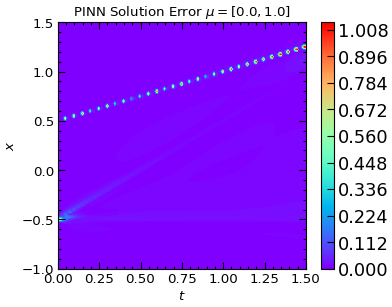

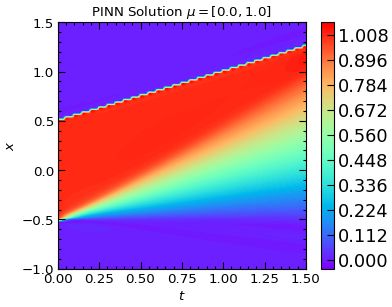

Epoch: 12200 | loss: 0.03888089582324028,rMAE: 0.016180235892534256, rRMSE:0.042556848376989365,loss_RH:0.00007010,loss_con:0.00000057,loss_R:0.03807757794857025,loss_IC:9.894130016618874e-06,loss_BC:3.396867214178201e-07
Epoch: 12400 | loss: 0.03379341587424278,rMAE: 0.014738813042640686, rRMSE:0.04279981926083565,loss_RH:0.00000000,loss_con:0.00006400,loss_R:0.03313083574175835,loss_IC:3.419801578274928e-05,loss_BC:3.205994289601222e-05
Epoch: 12600 | loss: 0.04770489037036896,rMAE: 0.019041990861296654, rRMSE:0.035528238862752914,loss_RH:0.00010410,loss_con:0.00010265,loss_R:0.045945677906274796,loss_IC:2.0267836589482613e-05,loss_BC:5.154855898581445e-05
Epoch: 12800 | loss: 0.0990910679101944,rMAE: 0.018506862223148346, rRMSE:0.046816740185022354,loss_RH:0.00011837,loss_con:0.00000659,loss_R:0.09782879054546356,loss_IC:4.389104105939623e-06,loss_BC:3.4710731142695295e-06
Epoch: 13000 | loss: 0.052227310836315155,rMAE: 0.027320638298988342, rRMSE:0.1047639548778534,loss_RH:0.000034

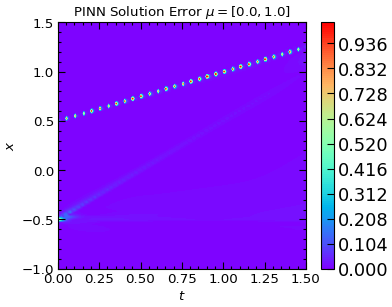

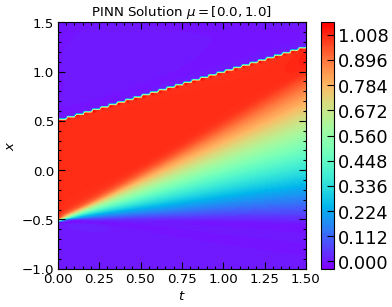

Epoch: 14200 | loss: 0.029679808765649796,rMAE: 0.01980666257441044, rRMSE:0.05614527687430382,loss_RH:0.00001828,loss_con:0.00001226,loss_R:0.029383301734924316,loss_IC:5.18622755407705e-06,loss_BC:6.180935088195838e-06
Epoch: 14400 | loss: 0.04140211641788483,rMAE: 0.028687838464975357, rRMSE:0.09864603728055954,loss_RH:0.00007742,loss_con:0.00003061,loss_R:0.040143225342035294,loss_IC:3.2653209927957505e-05,loss_BC:1.5817113308003172e-05
Epoch: 14600 | loss: 0.1614970862865448,rMAE: 0.14753207564353943, rRMSE:0.17273271083831787,loss_RH:0.00009014,loss_con:0.00020817,loss_R:0.05024346336722374,loss_IC:0.009683510288596153,loss_BC:0.0013517088955268264
Epoch: 14800 | loss: 0.10114352405071259,rMAE: 0.052551623433828354, rRMSE:0.1031104326248169,loss_RH:0.00004583,loss_con:0.00006639,loss_R:0.07447367161512375,loss_IC:0.002579601714387536,loss_BC:4.155472561251372e-05
Epoch: 15000 | loss: 0.09601675719022751,rMAE: 0.03691643476486206, rRMSE:0.08451620489358902,loss_RH:0.00000000,loss_

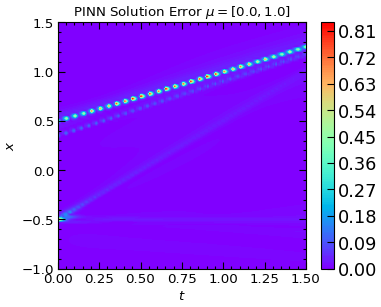

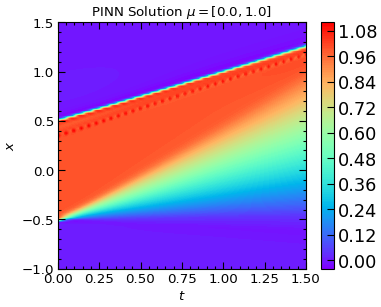

Epoch: 16200 | loss: 0.039237238466739655,rMAE: 0.02623550407588482, rRMSE:0.06120491400361061,loss_RH:0.00000000,loss_con:0.00005395,loss_R:0.03841591253876686,loss_IC:5.392061939346604e-05,loss_BC:2.82119435723871e-05
Epoch: 16400 | loss: 0.09214775264263153,rMAE: 0.02142805978655815, rRMSE:0.059462569653987885,loss_RH:0.00000000,loss_con:0.00006219,loss_R:0.0912303775548935,loss_IC:5.972673898213543e-05,loss_BC:3.2010921131586656e-05
Epoch: 16600 | loss: 0.030588680878281593,rMAE: 0.017421934753656387, rRMSE:0.05389132350683212,loss_RH:0.00000000,loss_con:0.00000560,loss_R:0.030397819355130196,loss_IC:1.5766683645779267e-05,loss_BC:3.3195015021192376e-06
Epoch: 16800 | loss: 0.08885830640792847,rMAE: 0.01684477925300598, rRMSE:0.05429379642009735,loss_RH:0.00000000,loss_con:0.00004896,loss_R:0.08826843649148941,loss_IC:3.409600685699843e-05,loss_BC:2.4891131033655256e-05
Epoch: 17000 | loss: 0.05098629370331764,rMAE: 0.01639728434383869, rRMSE:0.05437415465712547,loss_RH:0.00000000,

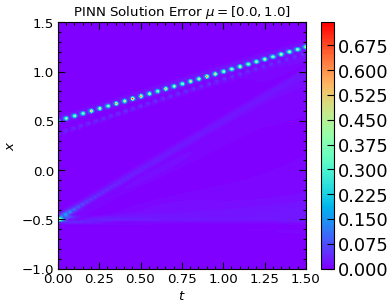

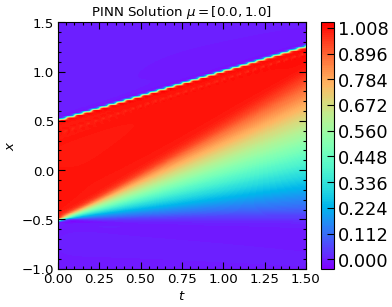

Epoch: 18200 | loss: 0.04317478463053703,rMAE: 0.019868671894073486, rRMSE:0.044923607259988785,loss_RH:0.00000000,loss_con:0.00000577,loss_R:0.04304778203368187,loss_IC:9.681597475719173e-06,loss_BC:3.0188416531018447e-06
Epoch: 18400 | loss: 0.03539177030324936,rMAE: 0.014764443971216679, rRMSE:0.041657496243715286,loss_RH:0.00000000,loss_con:0.00000015,loss_R:0.035342104732990265,loss_IC:4.807835011888528e-06,loss_BC:1.5873811776145885e-07
Epoch: 18600 | loss: 0.049775101244449615,rMAE: 0.019403893500566483, rRMSE:0.04220246896147728,loss_RH:0.00008217,loss_con:0.00000244,loss_R:0.048883188515901566,loss_IC:5.515538759937044e-06,loss_BC:1.5011842151579913e-06
Epoch: 18800 | loss: 0.02896949276328087,rMAE: 0.0160372294485569, rRMSE:0.04279950261116028,loss_RH:0.00004343,loss_con:0.00005225,loss_R:0.028160888701677322,loss_IC:1.1238578736083582e-05,loss_BC:2.6191184588242322e-05
Epoch: 19000 | loss: 0.035485219210386276,rMAE: 0.013636062853038311, rRMSE:0.04708769544959068,loss_RH:0.0

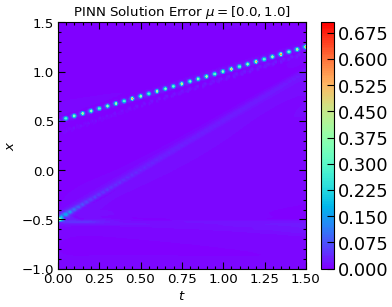

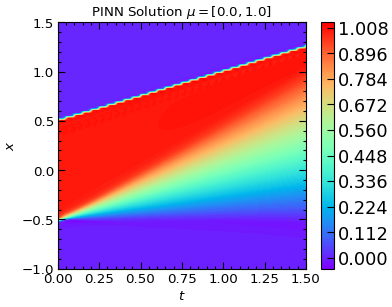

Epoch: 20200 | loss: 0.05189403519034386,rMAE: 0.009371609427034855, rRMSE:0.03875063359737396,loss_RH:0.00000000,loss_con:0.00000000,loss_R:0.051887188106775284,loss_IC:6.522303692690912e-07,loss_BC:3.2462153853884956e-08
Epoch: 20400 | loss: 0.040502578020095825,rMAE: 0.009218628518283367, rRMSE:0.03848020359873772,loss_RH:0.00000000,loss_con:0.00000001,loss_R:0.04049612209200859,loss_IC:6.157275151963404e-07,loss_BC:2.980556246257038e-08
Epoch: 20600 | loss: 0.057117294520139694,rMAE: 0.009123501367866993, rRMSE:0.0379655584692955,loss_RH:0.00000000,loss_con:0.00000007,loss_R:0.05711071938276291,loss_IC:5.990797262711567e-07,loss_BC:5.8479031395108905e-08
Epoch: 20800 | loss: 0.05608266964554787,rMAE: 0.009251979179680347, rRMSE:0.03795450180768967,loss_RH:0.00000000,loss_con:0.00000004,loss_R:0.05607694759964943,loss_IC:5.316020406098687e-07,loss_BC:4.0743529439168924e-08
Epoch: 21000 | loss: 0.053191084414720535,rMAE: 0.008875804021954536, rRMSE:0.03718667849898338,loss_RH:0.00000

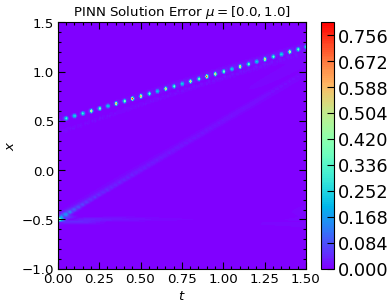

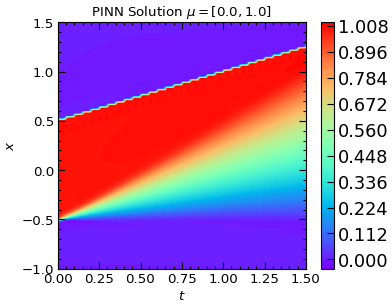

Epoch: 22200 | loss: 0.0375853106379509,rMAE: 0.008468426764011383, rRMSE:0.036367468535900116,loss_RH:0.00000000,loss_con:0.00000000,loss_R:0.03758130595088005,loss_IC:3.9074706137398607e-07,loss_BC:9.869364880898956e-09
Epoch: 22400 | loss: 0.0549176000058651,rMAE: 0.008275533095002174, rRMSE:0.03579031676054001,loss_RH:0.00000000,loss_con:0.00000011,loss_R:0.05491166561841965,loss_IC:5.27263296135061e-07,loss_BC:6.602072488703925e-08
Epoch: 22600 | loss: 0.04546719789505005,rMAE: 0.008428232744336128, rRMSE:0.03632504492998123,loss_RH:0.00000000,loss_con:0.00000005,loss_R:0.04546298459172249,loss_IC:3.874936282954877e-07,loss_BC:3.388397473713667e-08
Epoch: 22800 | loss: 0.036938220262527466,rMAE: 0.008490003645420074, rRMSE:0.036442674696445465,loss_RH:0.00000000,loss_con:0.00000000,loss_R:0.036934565752744675,loss_IC:3.5680167798091134e-07,loss_BC:8.467307743842412e-09
Epoch: 23000 | loss: 0.04969244450330734,rMAE: 0.00795590691268444, rRMSE:0.03546479716897011,loss_RH:0.00000000,

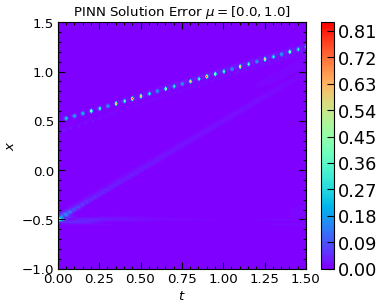

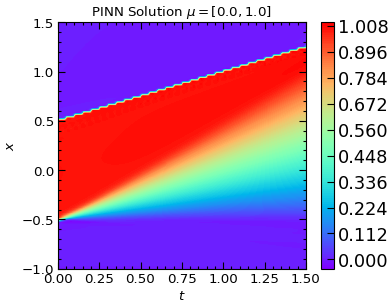

Epoch: 24200 | loss: 0.06196505203843117,rMAE: 0.007772509008646011, rRMSE:0.03532104194164276,loss_RH:0.00000000,loss_con:0.00000012,loss_R:0.06196024641394615,loss_IC:4.113821603368706e-07,loss_BC:6.929761298124504e-08
Epoch: 24400 | loss: 0.06846917420625687,rMAE: 0.007517934311181307, rRMSE:0.03492473438382149,loss_RH:0.00000000,loss_con:0.00000006,loss_R:0.06846512109041214,loss_IC:3.674004176446033e-07,loss_BC:3.75570934352254e-08
Epoch: 24600 | loss: 0.0640120804309845,rMAE: 0.0076171644032001495, rRMSE:0.03550443798303604,loss_RH:0.00000000,loss_con:0.00000010,loss_R:0.06400710344314575,loss_IC:4.3722855025407625e-07,loss_BC:6.018680664965359e-08
Epoch: 24800 | loss: 0.04965509846806526,rMAE: 0.00719045102596283, rRMSE:0.034583739936351776,loss_RH:0.00000000,loss_con:0.00000019,loss_R:0.04964910075068474,loss_IC:4.987299462300143e-07,loss_BC:1.0114447945852589e-07
Epoch: 25000 | loss: 0.04261481761932373,rMAE: 0.007473901379853487, rRMSE:0.035501863807439804,loss_RH:0.00000000,

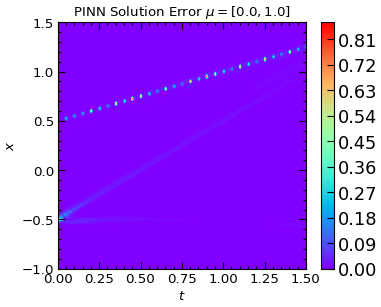

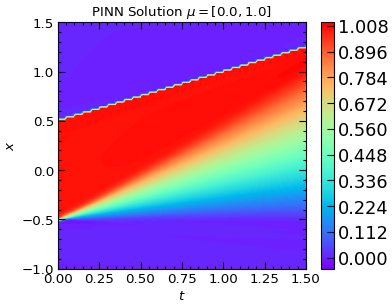

Epoch: 26200 | loss: 0.043399158865213394,rMAE: 0.007062263321131468, rRMSE:0.03502681851387024,loss_RH:0.00010145,loss_con:0.00000002,loss_R:0.04238172248005867,loss_IC:2.705013173454063e-07,loss_BC:1.880131783593697e-08
Epoch: 26400 | loss: 0.03898604214191437,rMAE: 0.007013604044914246, rRMSE:0.03530721738934517,loss_RH:0.00001535,loss_con:0.00000007,loss_R:0.03882911428809166,loss_IC:2.9601855544569844e-07,loss_BC:4.218561855395819e-08
Epoch: 26600 | loss: 0.049789801239967346,rMAE: 0.006800132337957621, rRMSE:0.03532756492495537,loss_RH:0.00001535,loss_con:0.00000026,loss_R:0.049630019813776016,loss_IC:4.892767151432054e-07,loss_BC:1.3450622304844728e-07
Epoch: 26800 | loss: 0.07259780168533325,rMAE: 0.007158147636801004, rRMSE:0.03376217186450958,loss_RH:0.00004813,loss_con:0.00000011,loss_R:0.07210879772901535,loss_IC:7.10821325355937e-07,loss_BC:6.438864375013509e-08
Epoch: 27000 | loss: 0.05101760849356651,rMAE: 0.006869260221719742, rRMSE:0.03505343571305275,loss_RH:0.0000214

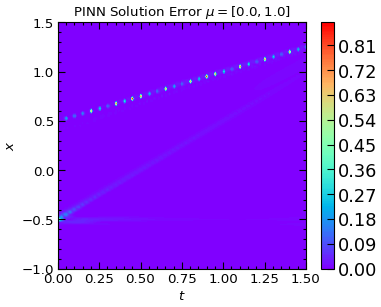

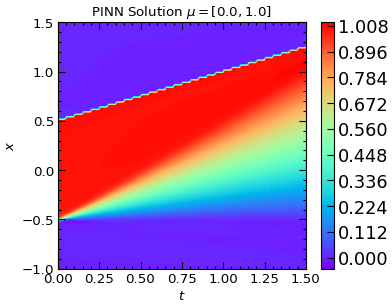

Epoch: 28200 | loss: 0.07423954457044601,rMAE: 0.0066029466688632965, rRMSE:0.034894220530986786,loss_RH:0.00004813,loss_con:0.00000016,loss_R:0.07375183701515198,loss_IC:5.564657499235182e-07,loss_BC:8.873541901266435e-08
Epoch: 28400 | loss: 0.04431192949414253,rMAE: 0.0067025949247181416, rRMSE:0.03484153375029564,loss_RH:0.00014143,loss_con:0.00000021,loss_R:0.042890965938568115,loss_IC:5.554355198000849e-07,loss_BC:1.1417375844757771e-07
Epoch: 28600 | loss: 0.0593152679502964,rMAE: 0.006555070169270039, rRMSE:0.035261668264865875,loss_RH:0.00004813,loss_con:0.00000010,loss_R:0.05883075296878815,loss_IC:2.683352988697152e-07,loss_BC:5.709303252388054e-08
Epoch: 28800 | loss: 0.04579014703631401,rMAE: 0.006536402273923159, rRMSE:0.03520543873310089,loss_RH:0.00014143,loss_con:0.00000000,loss_R:0.0443735234439373,loss_IC:2.2769012275603018e-07,loss_BC:7.877337893091862e-09
Epoch: 29000 | loss: 0.0540025569498539,rMAE: 0.0066449884325265884, rRMSE:0.03534029424190521,loss_RH:0.000048

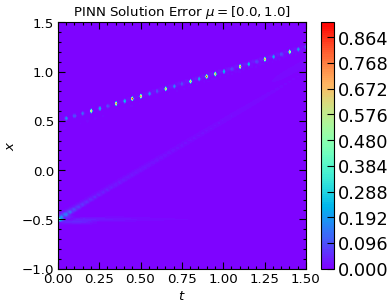

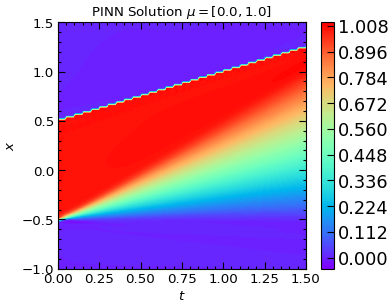

PINN Training Completed

PINN Training Time: 0.12884539931055367 Hours


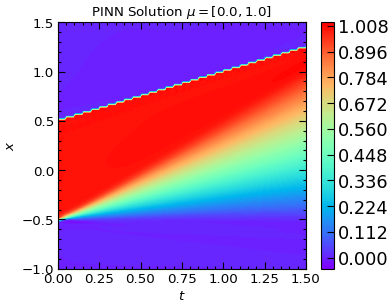

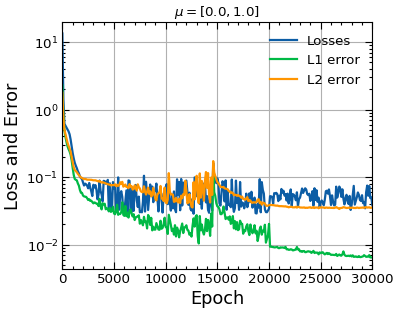

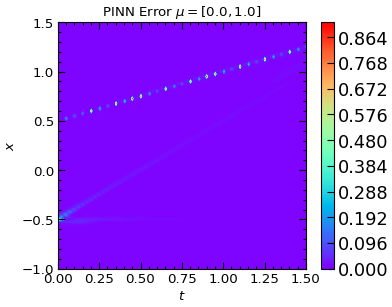

PINN at [0.0, 1.0] with the rMAE = 0.006505290977656841 and rRMSE = 0.03564750775694847


In [5]:
total_train_time_1 = time.perf_counter()
for i in range(0, 1):
    print("******************************************************************")
    ########################### Full PINN Training ###########################
    IC_data = create_IC_data(nu_pinn_train,Xi, Xf, Ti, Tf, IC_pts, IC_simple)
    IC_xt     = IC_data[0].to(device)
    IC_u      = IC_data[1].to(device)
    #plt.scatter(IC_xt[:,1].detach().cpu(),IC_xt[:,0].detach().cpu(),s=0.1)

    Exact_y = exact_u(nu_pinn_train,xt_test)[:,None].to(device)
    Burgers_plot(xt_test, Exact_y, Nx_test,Nt_test, title=fr"Exact Solution $\mu=[{nu_pinn_train[0]},{nu_pinn_train[1]}]$")

    pinn_train_time_1 = time.perf_counter()
    PINN = NN(nu_pinn_train, layers_pinn,dt).to(device)
        
    pinn_losses = pinn_train(PINN, nu_pinn_train, xt_resid, IC_xt, IC_u, BC1, BC2,xt_RHL, xt_RHR,xt_RHt,xt_RHtL, f_hat, Exact_y, epochs_pinn, lr_pinn, tol_pinn, xt_test)

    pinn_train_time_2 = time.perf_counter()
    print(f"PINN Training Time: {(pinn_train_time_2-pinn_train_time_1)/3600} Hours")

    Burgers_plot(xt_test, PINN(xt_test),Nx_test,Nt_test, title=fr"PINN Solution $\mu=[{nu_pinn_train[0]},{nu_pinn_train[1]}]$")
        
    plt.figure(dpi=80, figsize=(5,4))    
    plt.plot(pinn_losses[0], pinn_losses[1], linewidth=2, label="Losses")
    plt.plot(pinn_losses[0], pinn_losses[2], linewidth=2, label="L1 error")
    plt.plot(pinn_losses[0], pinn_losses[3], linewidth=2, label="L2 error")
    
    plt.xlabel("Epoch",     fontsize=16)
    plt.ylabel("Loss and Error", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
     
    plt.grid(True)
    plt.xlim(0,max(pinn_losses[0]))
    plt.yscale('log')
    plt.title(fr"$\mu=[{nu_pinn_train[0]},{nu_pinn_train[1]}]$",fontsize=12)
    plt.legend(fontsize = 12)#
    plt.show()

    # Compute Full PINN Error
    rMAE = max(sum(abs(PINN(xt_test)-Exact_y))/sum(abs(Exact_y)))
    rRMSE = torch.sqrt(sum((PINN(xt_test)-Exact_y)**2)/sum((Exact_y)**2)).item()
    Burgers_plot(xt_test, abs(PINN(xt_test)-Exact_y), Nx_test,Nt_test,title=fr"PINN Error $\mu=[{nu_pinn_train[0]},{nu_pinn_train[1]}]$")
    print(f"PINN at {nu_pinn_train} with the rMAE = {rMAE} and rRMSE = {rRMSE}")
total_train_time_2 = time.perf_counter()            

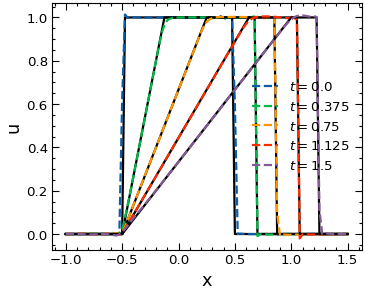

In [8]:
plt.figure(dpi=80, figsize=(5,4))#dpi=150, figsize=(10,8)

for ind in range(1, Nt_test+1,50):
    plt.plot(xt_test[0:Nx_test,0].detach().cpu(),Exact_y[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'k')
    #plt.scatter(xt_test[0:Nx_test,0].detach().cpu(),PINN(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),s=20,label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
    plt.plot(xt_test[0:Nx_test,0].detach().cpu(),PINN(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'--',label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
plt.xlabel("x",     fontsize=16)
plt.ylabel("u", fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.legend(fontsize = 12)#
plt.show()

In [10]:
w1 = PINN.linears[0].weight.detach().cpu()
w2 = PINN.linears[1].weight.detach().cpu()
w3 = PINN.linears[2].weight.detach().cpu()
w4 = PINN.linears[3].weight.detach().cpu()
w5 = PINN.linears[4].weight.detach().cpu()
w6 = PINN.linears[5].weight.detach().cpu()

b1 = PINN.linears[0].bias.detach().cpu()
b2 = PINN.linears[1].bias.detach().cpu()
b3 = PINN.linears[2].bias.detach().cpu()
b4 = PINN.linears[3].bias.detach().cpu()
b5 = PINN.linears[4].bias.detach().cpu()
b6 = PINN.linears[5].bias.detach().cpu()

# Add new activation functions
P_list[i] = P(layers_pinn, w1, w2, w3, w4, w5,w6, b1, b2, b3, b4,b5,b6).to(device)

import pickle 
with open('IFNN_shockrare.pkl', 'wb') as f:
        pickle.dump(P_list, f)